In [2]:
import pandas as pd
import numpy as np
import modeltest as deep
import experiment as exp
import myutil as util

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

import importlib
importlib.reload(deep)
importlib.reload(exp)

<module 'experiment' from 'c:\\Users\\kyeongtaek\\generative_model\\land_sat\\experiment.py'>

In [3]:
#파일 읽기
filepath_german_csv = 'sat.csv'
d_german_df = pd.read_csv(filepath_german_csv)

#numpy 변환
d_german_np = np.array(d_german_df)

# sample 수, 특징 수 등 계산
n_row = d_german_np.shape[0]
n_features = d_german_np.shape[1]-1

# 입력과 출력 데이터 분리
x = d_german_np[:, :n_features]
y = d_german_np[:, n_features]-1

#정규화
x_norm = (x - np.min(x,0))/ (np.max(x,0) - np.min(x,0))
y_norm = (y - np.min(y,0))/ (np.max(y,0) - np.min(y,0))

In [8]:
int(y_test[j]), int(o[j])

array([0, 1, 2, 3, 4, 6], dtype=int64)

21/21 [==============================] - 0s 6ms/step
0/10	 test_acc:0.8911353032659409


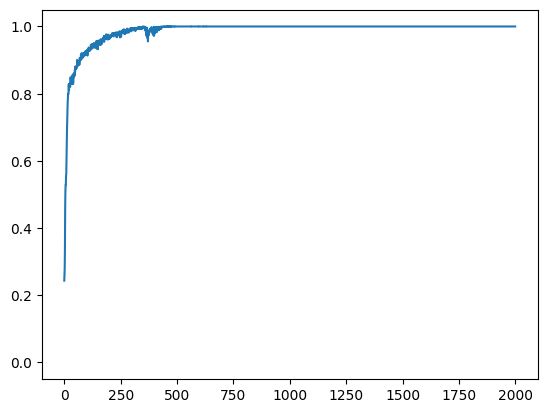

21/21 [==============================] - 0s 5ms/step
1/10	 test_acc:0.8959627329192547


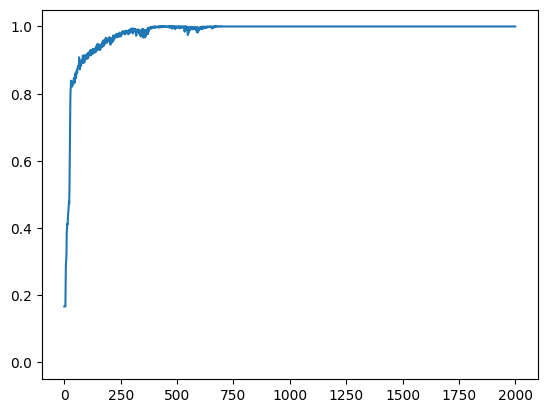

21/21 [==============================] - 0s 2ms/step
2/10	 test_acc:0.8600311041990669


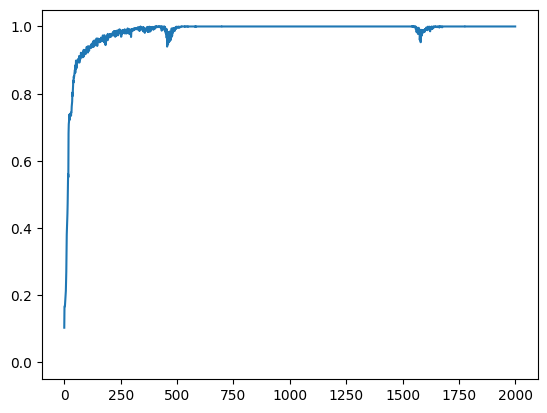

21/21 [==============================] - 0s 3ms/step
3/10	 test_acc:0.8555900621118012


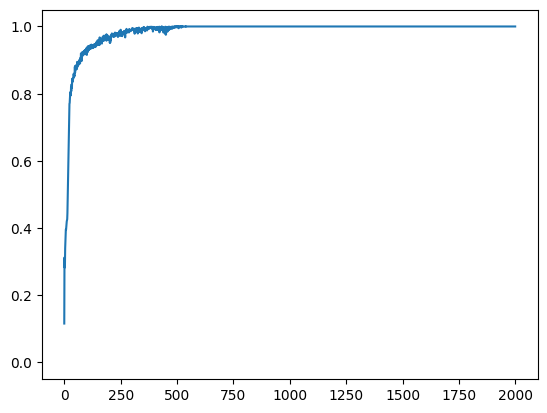

21/21 [==============================] - 0s 2ms/step
4/10	 test_acc:0.911353032659409


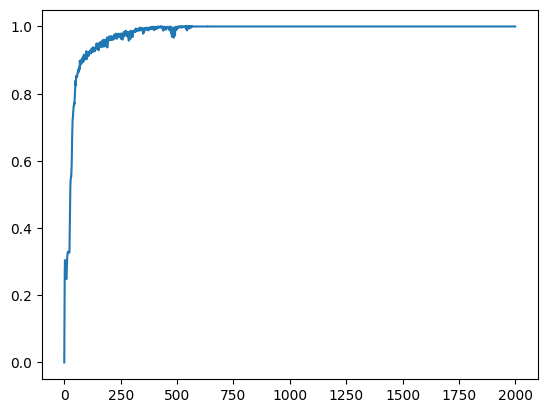

21/21 [==============================] - 0s 2ms/step
5/10	 test_acc:0.9129082426127527


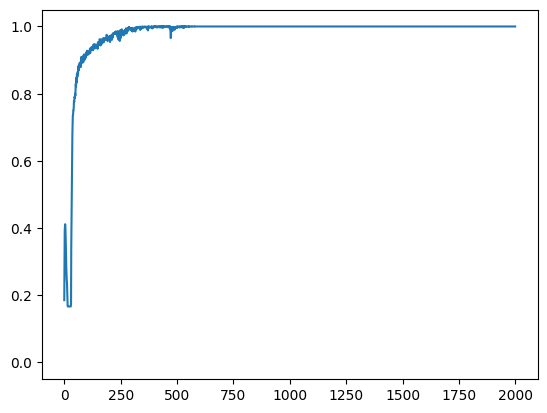

21/21 [==============================] - 0s 2ms/step
6/10	 test_acc:0.8105590062111802


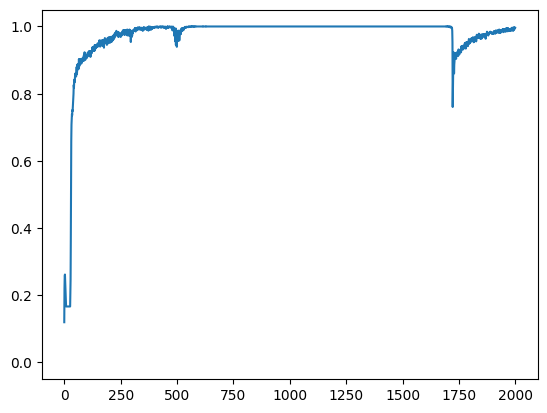

21/21 [==============================] - 0s 2ms/step
7/10	 test_acc:0.7340590979782271


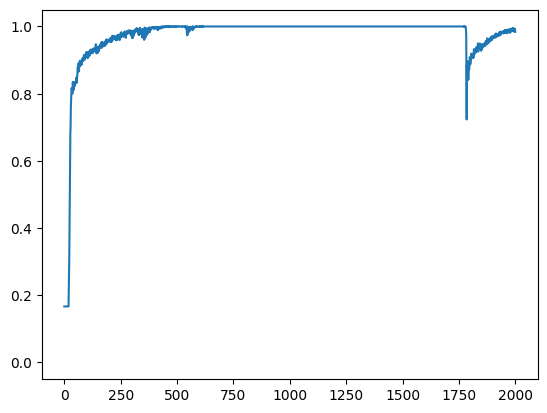

21/21 [==============================] - 0s 2ms/step
8/10	 test_acc:0.8555900621118012


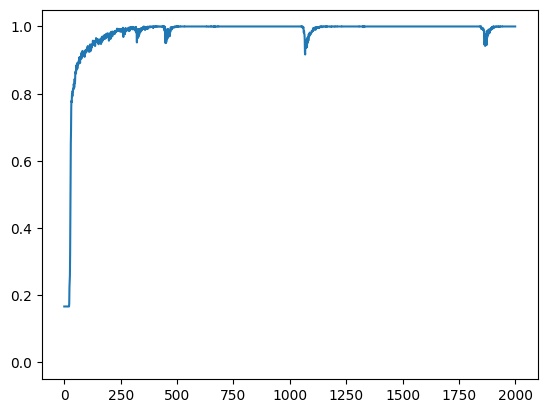

21/21 [==============================] - 0s 2ms/step
9/10	 test_acc:0.9035769828926905


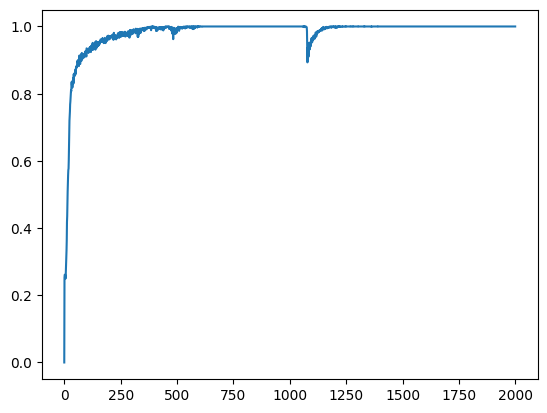

average accuracy : 0.8630765626962125


In [4]:
# 10fold validation 수행여부
bTenFoldValidation = True
if not bTenFoldValidation:  # 학습 & 테스트를 1회만 수행하는 경우
    # 데이터 분할
    [x_train, x_val, x_test, y_train, y_val, y_test] = exp.split_data(x, y, test_ratio=0.0, val_ratio=0.1)

    # 모델 불러오기 & 컴파일
    m = deep.get_model_gen(x.shape[1:])
    m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # 학습시 사용하는 옵션
    train_options = exp.TrainParams(m, epochs=500, batch_size_per_class=32)

    # 학습
    result = exp.train_batches_with_random_selection(train_options, x_train, y_train, x_val, y_val)

    # 테스트
    if(x_test.shape[0] > 0):
        test_acc_tmp = np.sum(np.argmax(np.squeeze(result.model.predict(x_test)), -1) == y_test) / y_test.shape[0]
        print(f'test_acc:{test_acc_tmp}')
    # 결과 출력

    plt.plot(result.train_acc)
    plt.plot(result.val_acc)
    plt.show()

else:  # N fold Validation
    idx = np.array(range(n_row))
    np.random.shuffle(idx)  # 데이터 인덱스 섞기

    N = 10
    total = 0
    nClass = 6
    cm_sum = np.zeros([nClass, nClass])
    for i in range(N):
        # Train/Test 데이터 분할
        [x_train, x_test, y_train, y_test] = exp.split_data_for_N_fold_validation(x, y, fold=N, idx=i)

        # 모델 불러오기 & 컴파일
        m = deep.get_model_gen(x.shape[1:])
        #m = deep.get_model(x.shape[1:])

        # m = deep.get_model(x.shape[1:])
        m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

        # 학습시 사용하는 옵션
        train_options = exp.TrainParams(m, epochs=2000, batch_size_per_class=256)

        # 학습
        result = exp.train_batches_with_random_selection(train_options, x_train, y_train, bVerbose=False)

        # 테스트
        o = np.argmax(np.squeeze(result.model.predict(x_test)), -1)
        test_acc_tmp = np.sum(o == y_test) / y_test.shape[0]
        cm = np.zeros([nClass, nClass])
        for j in range(y_test.shape[0]):
            cm[int(y_test[j]-1), int(o[j]-1)] += 1  #Confusion Matrix 계산
        cm_sum += cm


        # 결과 출력
        print(f'{i}/{N}\t test_acc:{test_acc_tmp}')
        plt.plot(result.train_acc)
        plt.plot(result.val_acc)
        plt.show()
        total = total + test_acc_tmp

ave = total/10
print(f'average accuracy : {ave}')

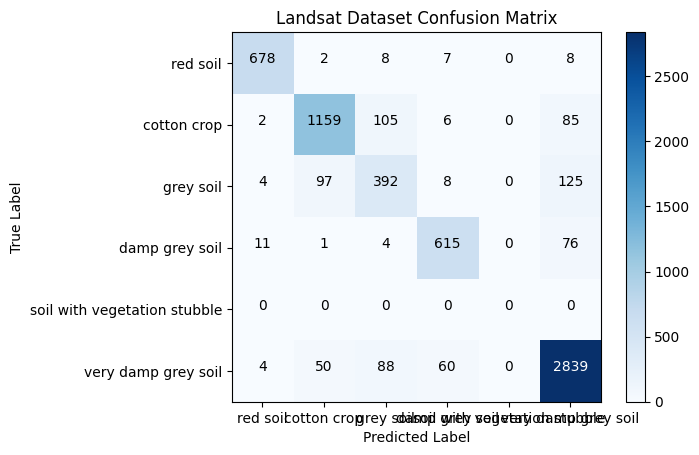

In [4]:
conf_matrix = cm_sum
# 시각화
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Landsat Dataset Confusion Matrix')
plt.colorbar()

classes = ['red soil', 'cotton crop', 'grey soil', 'damp grey soil', 'soil with vegetation stubble', 'very damp grey soil']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 각 셀에 숫자 표시
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(int(conf_matrix[i, j])),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

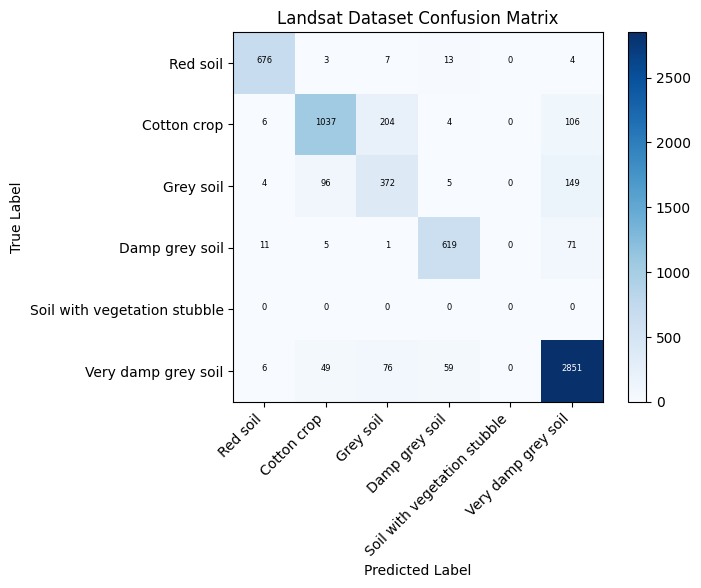

In [5]:
conf_matrix = cm_sum

# 시각화
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Landsat Dataset Confusion Matrix')
plt.colorbar()

classes = ['Red soil', 'Cotton crop', 'Grey soil', 'Damp grey soil', 'Soil with vegetation stubble', 'Very damp grey soil']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, ha='right')
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 각 셀에 숫자 표시
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(int(conf_matrix[i, j])),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black",
                 fontsize=6)  # 숫자의 글자 크기 조절

plt.show()


In [7]:
import tensorflow as tf

  # 모델 불러오기
load_model = tf.keras.models.load_model('sat_model.h5')

In [8]:
import tensorflow as tf
cam_model = tf.keras.Model(load_model.input, outputs=(load_model.layers[-16].output, load_model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27_input (InputLayer)  [(None, 36)]             0         
                                                                 
 dense_27 (Dense)            (None, 4096)              151552    
                                                                 
 batch_normalization_27 (Bat  (None, 4096)             16384     
 chNormalization)                                                
                                                                 
 reshape_9 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 up_sampling2d_27 (UpSamplin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 16, 16, 32)        18464 

In [9]:
get_output = tf.keras.backend.function([load_model.layers[0].input],
                                       [load_model.layers[-16].output, load_model.layers[-1].output])
[conv_outputs, cam_predictions] = get_output([x_test])
class_weights = load_model.layers[-1].get_weights()[0]

In [42]:
final_img = np.squeeze(conv_outputs[50])

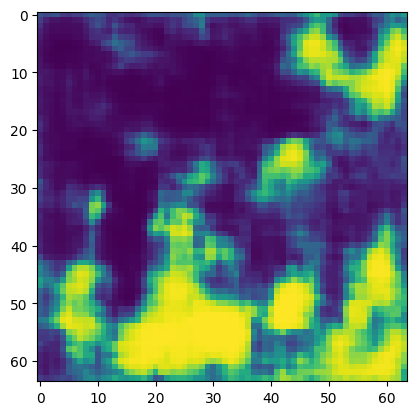

In [43]:
from matplotlib.pyplot import imshow

imshow(final_img)